# ** Geely Auto Case Study**

In [2]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

D:\downloads\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\downloads\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Problem
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

### GOAL OF OUR PREDICTION
You are required to model the price of cars with the available independent variables. 
It will be used by the management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [3]:
# Read the file
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Splitiing CarName in order to extract company name 
car['company']=car['CarName'].str.split(' ',1)
# Returning company name from list 
def first(m):
    return m[0]
car.company = car.company.apply(first)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [5]:
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
# Cleaning the data by correcting spell mistake and different name for same company
car['company'] = car['company'].str.replace('vw','volkswagen')
car['company'] = car['company'].str.replace('vokswagen','volkswagen')
car['company'] = car['company'].str.replace('porcshce','porsche')
car['company'] = car['company'].str.replace('toyouta','toyota')
car['company'] = car['company'].str.replace('maxda','mazda')
car['company'] = car['company'].str.replace('nissan','Nissan')
car.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### We need to change categorical variable d.type as object in to numeric data type
We can not run LineaRegression on object data type for that all the data type should be numeric

In [7]:
# check the datatypes of all columns
car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company              object
dtype: object

In [8]:
# Symboling is a categorical variable in order to get column name as string while creating dummy
#  variable replace it with string values
car.symboling.unique()
car['symboling'] = car['symboling'].replace(3,'three')
car['symboling'] = car['symboling'].replace(1,'one')
car['symboling'] = car['symboling'].replace(2,'two')
car['symboling'] = car['symboling'].replace(0,'zero')
car['symboling'] = car['symboling'].replace(-1,'minusOne')
car['symboling'] = car['symboling'].replace(-2,'minusTwo')
car.symboling.unique()

array(['three', 'one', 'two', 'zero', 'minusOne', 'minusTwo'],
      dtype=object)

In [9]:
# Categorical variable with only two state
car.fueltype.unique()
# Converting it in to binary 
car.fueltype = car.fueltype.map({'diesel':1,'gas':0})
car.fueltype.unique()
car.aspiration.unique()
car.aspiration = car.aspiration.map({'std':0,'turbo':1})
car.doornumber.unique() 
car.doornumber = car.doornumber.map({'two':1,'four':0})
car.enginelocation.unique()
car.enginelocation= car.enginelocation.map({'front':0,'rear':1})

In [10]:
car['cylindernumber'] = car['cylindernumber'].map({'four': 'fourcylinder', 'six': 'sixcylinder','five':'fivecylinder',
                    'three':'threecylinder','twelve':'twelvecylinder','two':'twocylinder','eight':'eightcylinder'})


In [11]:
# categorical variables with more then two unique values need to be converted in to dummy variabes
car.drivewheel.unique()
car.fuelsystem.unique()
car.enginetype.unique()
car.carbody.unique()
car.cylindernumber.unique()
status = pd.get_dummies(car['company'],drop_first=True)
status1 = pd.get_dummies(car['enginetype'],drop_first=True)
status2 = pd.get_dummies(car['fuelsystem'],drop_first=True)
status3 = pd.get_dummies(car['drivewheel'],drop_first=True)
status4 = pd.get_dummies(car['carbody'],drop_first=True)
status5 = pd.get_dummies(car['symboling'],drop_first=True)
status6 = pd.get_dummies(car['cylindernumber'],drop_first=True)



In [12]:
# Concatenate the dummy variables to form the dataset
car = pd.concat([car,status5,status4,status3,status2,status1,status,status6],axis=1)

In [13]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,subaru,toyota,volkswagen,volvo,fivecylinder,fourcylinder,sixcylinder,threecylinder,twelvecylinder,twocylinder
0,1,three,alfa-romero giulia,0,0,1,convertible,rwd,0,88.6,...,0,0,0,0,0,1,0,0,0,0
1,2,three,alfa-romero stelvio,0,0,1,convertible,rwd,0,88.6,...,0,0,0,0,0,1,0,0,0,0
2,3,one,alfa-romero Quadrifoglio,0,0,1,hatchback,rwd,0,94.5,...,0,0,0,0,0,0,1,0,0,0
3,4,two,audi 100 ls,0,0,0,sedan,fwd,0,99.8,...,0,0,0,0,0,1,0,0,0,0
4,5,two,audi 100ls,0,0,0,sedan,4wd,0,99.4,...,0,0,0,0,1,0,0,0,0,0


In [14]:
car.dtypes

car_ID                int64
symboling            object
CarName              object
fueltype              int64
aspiration            int64
doornumber            int64
carbody              object
drivewheel           object
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
company              object
minusTwo              uint8
one                   uint8
three                 uint8
                     ...   
ohcf                  uint8
ohcv                  uint8
rotor                 uint8
alfa-romero           uint8
audi                

In [15]:
car.drop(['car_ID','CarName','carbody','drivewheel','symboling','company','enginetype','fuelsystem','cylindernumber'],axis=1,inplace=True)

In [16]:
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,subaru,toyota,volkswagen,volvo,fivecylinder,fourcylinder,sixcylinder,threecylinder,twelvecylinder,twocylinder
0,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,1,0,0,0,0,0


### We  need to normalize the data so because absolute data may gave error or very high value of MSE because of outliers

In [17]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car = car.apply(normalize)

In [18]:
car.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,subaru,toyota,volkswagen,volvo,fivecylinder,fourcylinder,sixcylinder,threecylinder,twelvecylinder,twocylinder
0,0.0,0.0,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# determinig x and y values 
X =car.loc[:,car.columns !='price']
y= car.price

In [20]:
# split the data in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [21]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [22]:
# creating an object for Linear Regression and application of RFE
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False  True False False  True False  True  True  True  True
 False False False False False  True False False False False False False
 False False False False False False False False False False False  True
  True False False False  True False False  True False False False False
 False False False False False  True False  True False False False False
 False  True  True  True  True  True  True  True]
[19 14 42  1 13 16  1  5  1  1  1  1 20 27  8 29 12  1 38 32 39 40 22 21
 23 24 47 34 26 31 18 35 44 45 36  1  1 46  7 30  1 33  3  1  2 17 11 10
 41 25 49 37  6  1  9  1 28  4 15 43 48  1  1  1  1  1  1  1]


In [23]:
# Getting of summary RFE reduced model 
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     123.9
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.41e-70
Time:                        22:26:24   Log-Likelihood:                 242.70
No. Observations:                 143   AIC:                            -447.4
Df Residuals:                     124   BIC:                            -391.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2273      0.064     -3.

In [24]:
# Finding vif value for the model
ca=car[['enginelocation','carwidth','price','curbweight','enginesize','boreratio',
        'stroke','bmw','peugeot','porsche','volvo','minusTwo','dohcv','l','rotor','fivecylinder'
       ,'fourcylinder','sixcylinder','threecylinder','twelvecylinder','twocylinder']]
vif_cal(input_data=ca,dependent_col='price')

D:\downloads\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
19,twocylinder,inf
12,l,inf
17,threecylinder,inf
7,peugeot,inf
13,rotor,inf
3,enginesize,61.270000
2,curbweight,57.090000
1,carwidth,46.630000
4,boreratio,37.240000
15,fourcylinder,35.240000


### Calculating VIF value by removing VIF infinite value terms

In [25]:

vif_cal(input_data=ca[['enginelocation','carwidth','price','curbweight','enginesize','boreratio',
        'stroke','bmw','peugeot','porsche','volvo','minusTwo','dohcv','rotor','fivecylinder'
       ,'fourcylinder','sixcylinder','twelvecylinder']],dependent_col='price')

,Var,Vif
3,enginesize,57.89
2,curbweight,57.09
1,carwidth,46.60
4,boreratio,34.09
14,fourcylinder,31.30
5,stroke,24.45
8,porsche,5.34
0,enginelocation,4.58
15,sixcylinder,4.25
13,fivecylinder,4.17


### Removing high value VIF terms

In [26]:
vif_cal(input_data=ca[['enginelocation','price','enginesize','stroke','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']],dependent_col='price')


,Var,Vif
1,enginesize,5.59
5,porsche,5.06
2,stroke,4.47
0,enginelocation,4.04
8,dohcv,2.01
6,volvo,1.48
7,minusTwo,1.38
11,twelvecylinder,1.24
3,bmw,1.14
10,fivecylinder,1.12


### Dataset for the first model

In [27]:
model1 =ca[['enginelocation','price','enginesize','stroke','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']]

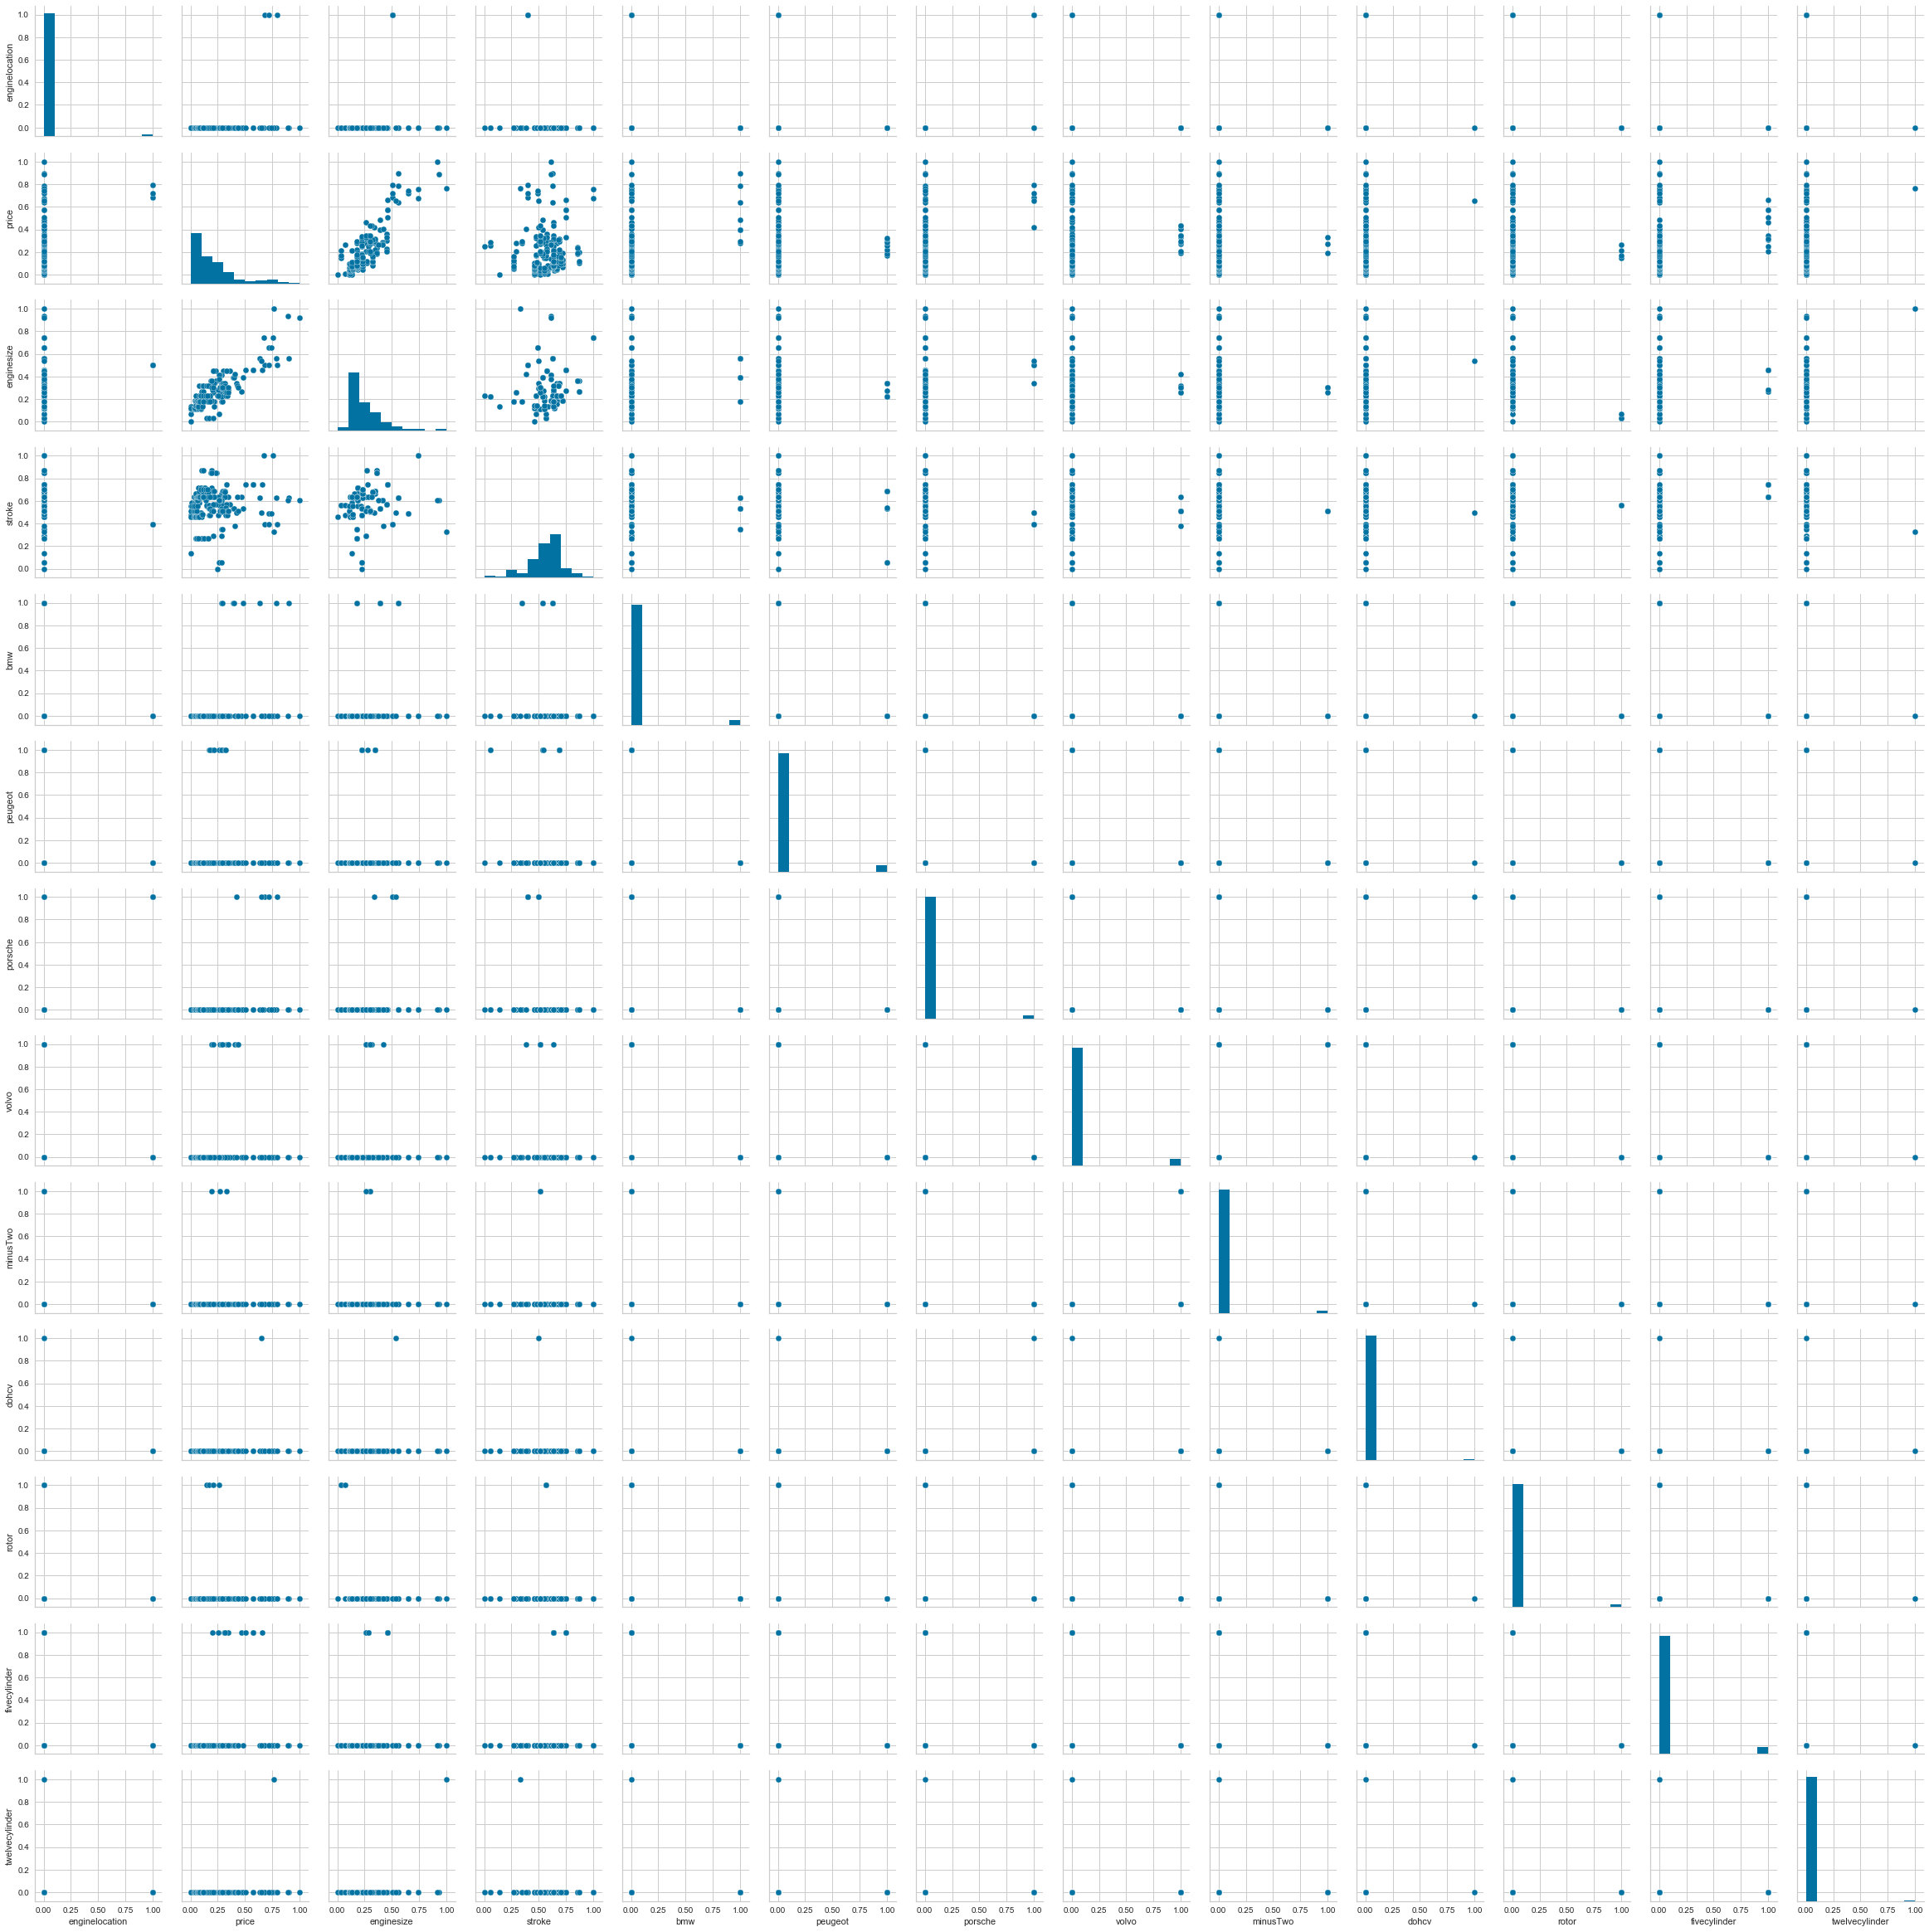

In [28]:
# pairplot for inding the multicollinearity between to independent variables
sns.pairplot(model1)

In [29]:

m = model1.loc[:,model1.columns !='price']
n= model1['price']

### Splitting the dataset

In [30]:

m_train, m_test, n_train, n_test = train_test_split(m, n, train_size=0.7 , random_state=100)

In [31]:
# object for model
ln = LinearRegression()

In [32]:

ln.fit(m_train,n_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print('intercpt==' ,ln.intercept_)

intercpt== -0.05077569727854725


### Value of coefficients for the model

In [34]:

coeff_df = pd.DataFrame(ln.coef_,m_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
enginelocation,0.120385
enginesize,1.052466
stroke,-0.069856
bmw,0.196690
peugeot,0.043323
porsche,0.147472
volvo,0.147670
minusTwo,-0.146717
dohcv,0.026399
rotor,0.240688


### Prediction of value for the test model 

In [35]:
n_pred = ln.predict(m_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(n_test, n_pred)
r_squared = r2_score(n_test, n_pred)

In [37]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005315595961136984
r_square_value : 0.8768326804524242


In [38]:
m_train_sm = m_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
m_train_sm = sm.add_constant(m_train_sm)
# create a fitted model in one line
ln_1 = sm.OLS(n_train,m_train_sm).fit()

# print the coefficients
ln_1.params

const            -0.050776
enginelocation    0.120385
enginesize        1.052466
stroke           -0.069856
bmw               0.196690
peugeot           0.043323
porsche           0.147472
volvo             0.147670
minusTwo         -0.146717
dohcv             0.026399
rotor             0.240688
fivecylinder      0.141346
twelvecylinder   -0.212092
dtype: float64

In [39]:
print(ln_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     93.27
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.39e-58
Time:                        22:26:34   Log-Likelihood:                 194.03
No. Observations:                 143   AIC:                            -362.1
Df Residuals:                     130   BIC:                            -323.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0508      0.022     -2.

In [40]:
# Calculating the vif by removing high value vif value in previous model
vif_cal(input_data=ca[['price','enginesize','stroke','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']],dependent_col='price')


,Var,Vif
0,enginesize,5.53
1,stroke,4.44
5,volvo,1.48
4,porsche,1.41
6,minusTwo,1.38
7,dohcv,1.25
10,twelvecylinder,1.24
2,bmw,1.14
9,fivecylinder,1.12
3,peugeot,1.08


In [41]:
# Bulding second model 
model2 = model1[['price','enginesize','stroke','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']]

In [42]:
o = model2[['enginesize','stroke','bmw','peugeot','porsche','volvo','minusTwo','dohcv','rotor','fivecylinder',
            'twelvecylinder']]
p = model2['price']

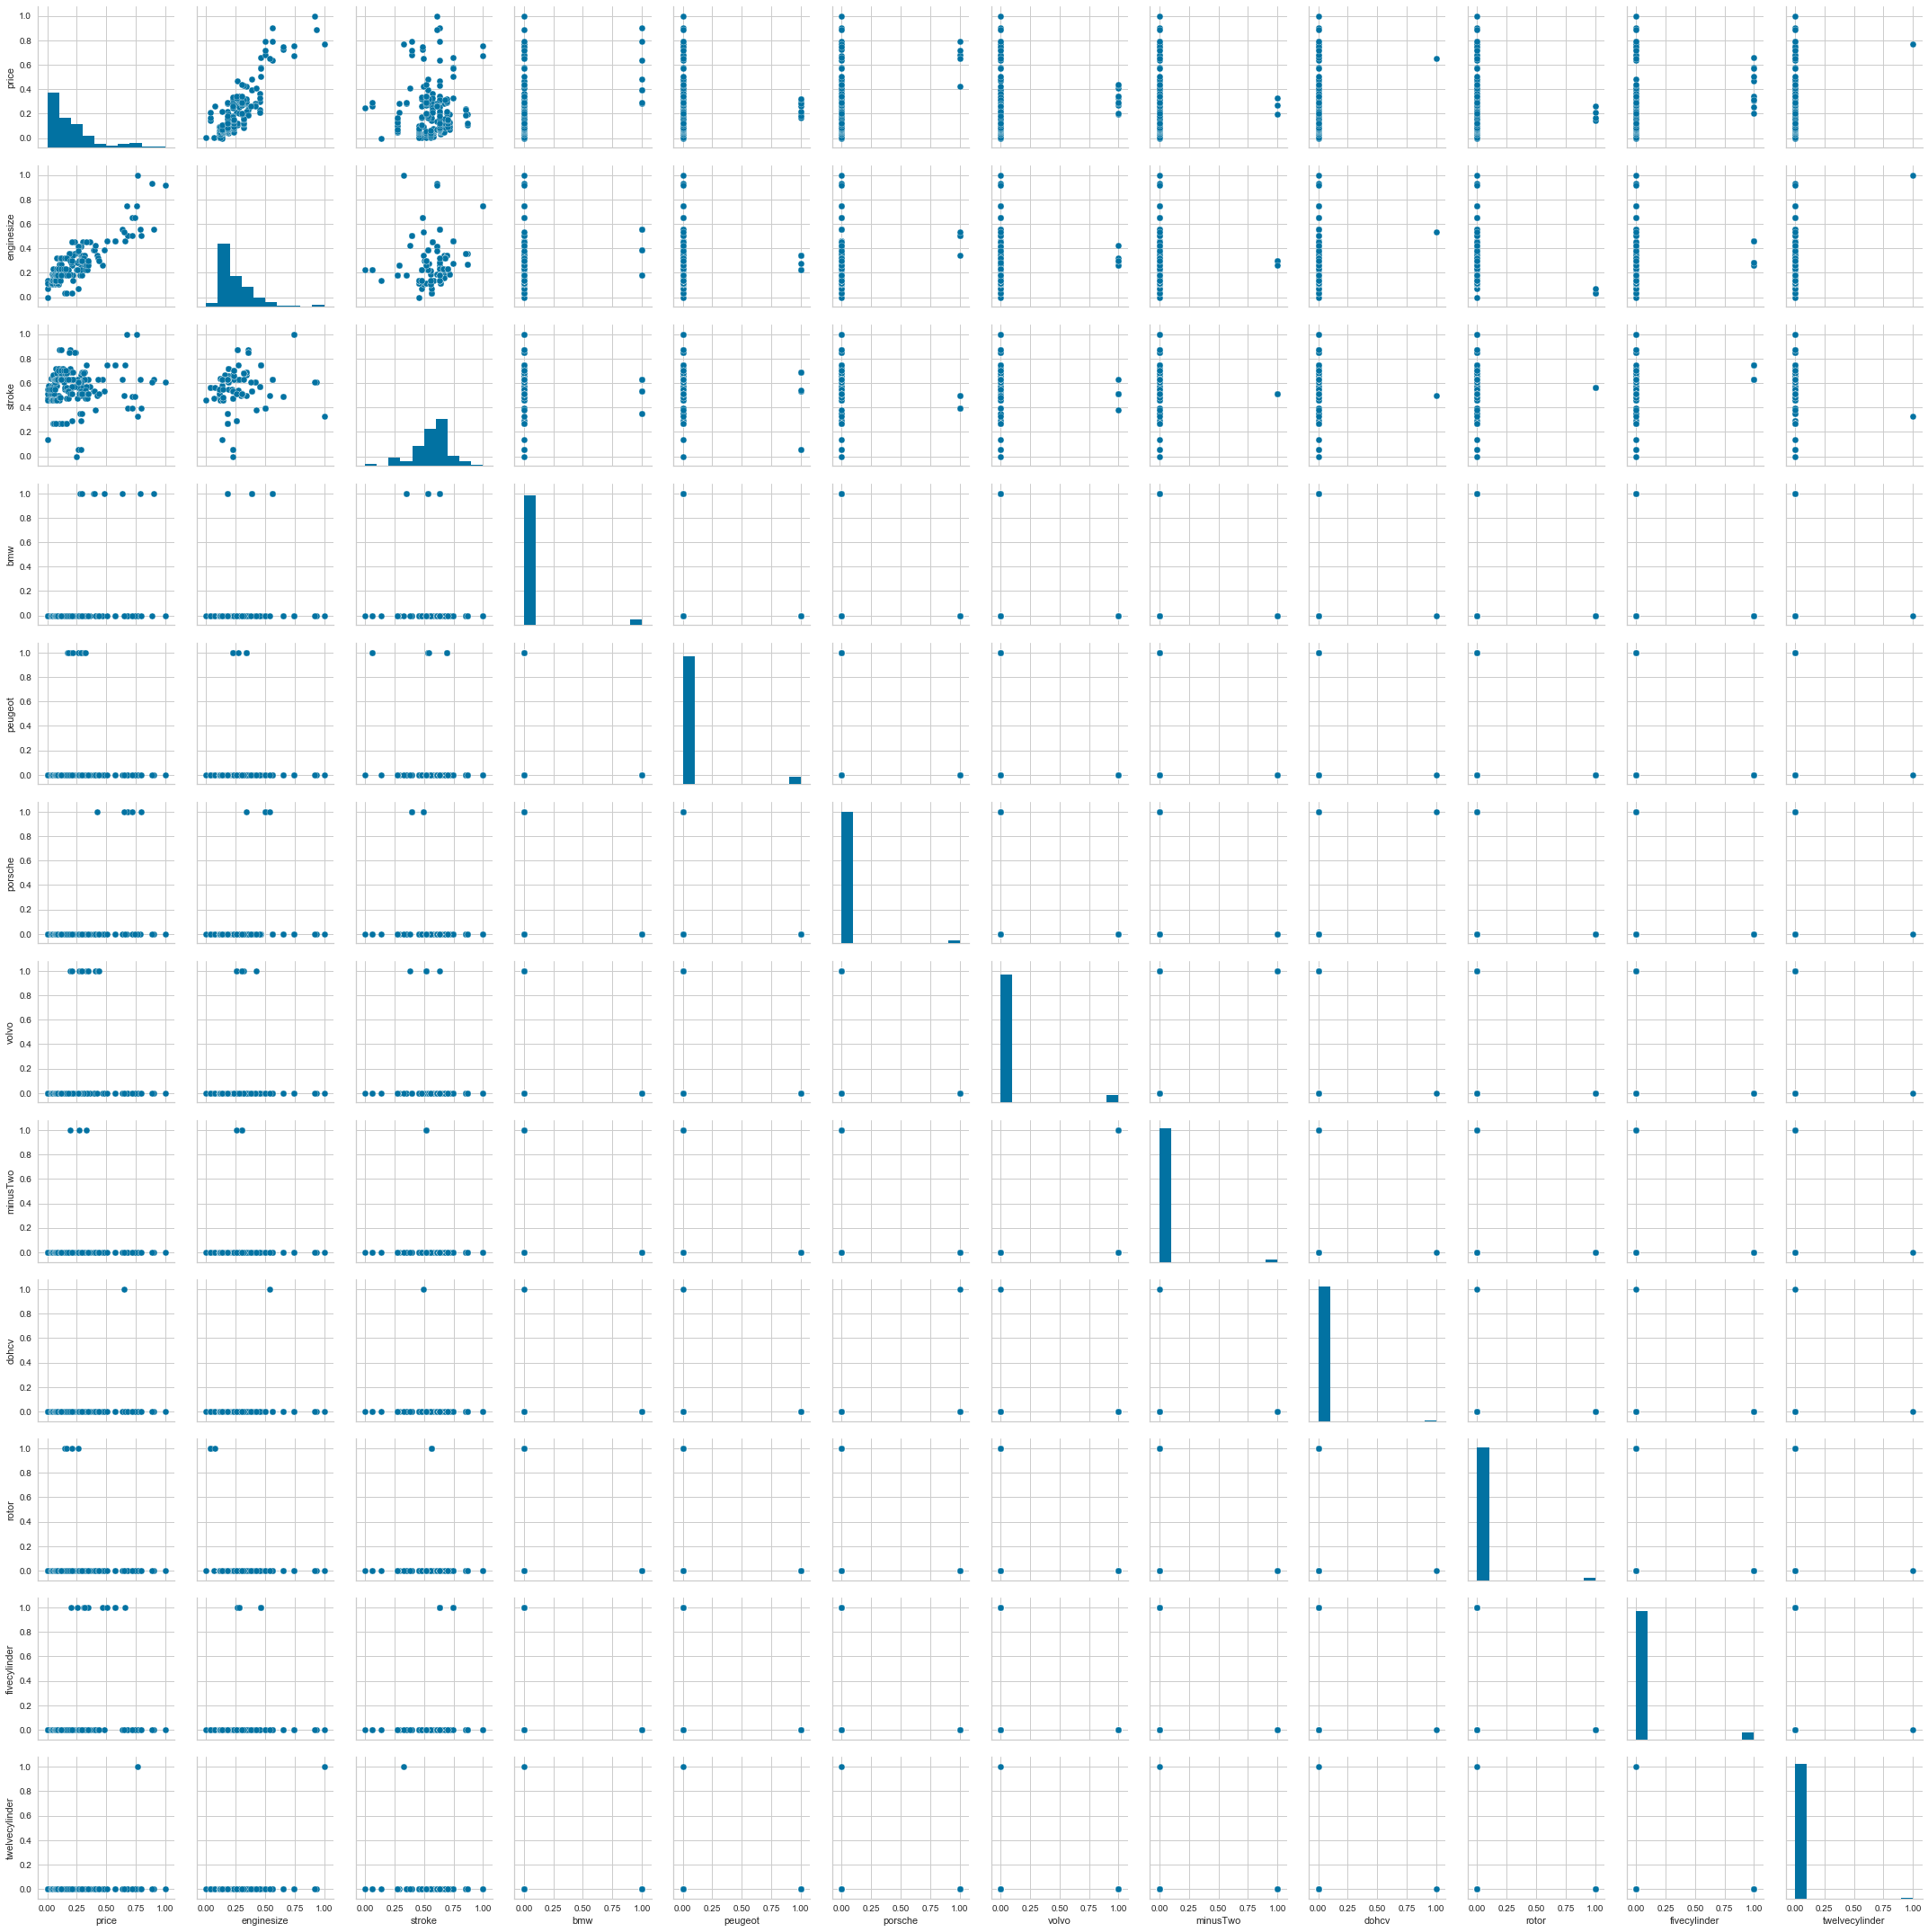

In [43]:
# pairplot for second model to check multicollinearity
sns.pairplot(model2)

In [44]:
# Split the dataset for model2
o_train, o_test, p_train, p_test = train_test_split(o, p, train_size=0.7 , random_state=100)

In [45]:
l = LinearRegression()

In [46]:
l.fit(o_train,p_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print('intercept==',l.intercept_)

intercept== -0.049800410733853356


In [48]:
# coefficient for the second model
coeff_df = pd.DataFrame(l.coef_,o_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
enginesize,1.059014
stroke,-0.074031
bmw,0.195259
peugeot,0.042762
porsche,0.205793
volvo,0.146696
minusTwo,-0.146548
dohcv,-0.034339
rotor,0.241785
fivecylinder,0.140961


In [49]:
p_pred = l.predict(o_test)

In [50]:
o_train_sm = o_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
o_train_sm = sm.add_constant(o_train_sm)
# create a fitted model in one line
l_1 = sm.OLS(p_train,o_train_sm).fit()

# print the coefficients
l_1.params

const            -0.049800
enginesize        1.059014
stroke           -0.074031
bmw               0.195259
peugeot           0.042762
porsche           0.205793
volvo             0.146696
minusTwo         -0.146548
dohcv            -0.034339
rotor             0.241785
fivecylinder      0.140961
twelvecylinder   -0.218244
dtype: float64

In [51]:
print(l_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.08e-58
Time:                        22:26:43   Log-Likelihood:                 193.11
No. Observations:                 143   AIC:                            -362.2
Df Residuals:                     131   BIC:                            -326.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0498      0.022     -2.

### From this we can predict that enginesize and stroke are satisfy multicollinearity so we have to drop one

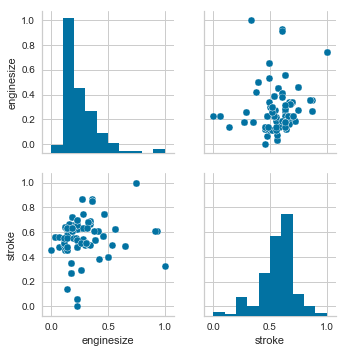

In [52]:
sns.pairplot(model2[['enginesize','stroke']])

In [53]:
# vif for the model
vif_cal(input_data=ca[['price','enginesize','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']],dependent_col='price')

,Var,Vif
0,enginesize,1.60
4,volvo,1.47
5,minusTwo,1.38
3,porsche,1.35
6,dohcv,1.25
1,bmw,1.12
8,fivecylinder,1.12
9,twelvecylinder,1.09
2,peugeot,1.08
7,rotor,1.00


In [54]:
# Building the third model
model3 = model2[['price','enginesize','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']]

In [55]:
q =model3[['enginesize','bmw','peugeot','porsche','volvo','minusTwo',
                       'dohcv','rotor','fivecylinder','twelvecylinder']]
r=model3['price']

In [56]:
# Split the dataset
q_train, q_test, r_train, r_test = train_test_split(q, r, train_size=0.7 , random_state=100)

In [57]:
lq= LinearRegression()
lq.fit(q_train,r_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
print('intercept==',lq.intercept_)

intercept== -0.08441960935392284


In [59]:
# Prediction of model
r_pred = lq.predict(q_test)

In [60]:
q_train_sm = q_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
q_train_sm = sm.add_constant(q_train_sm)
# create a fitted model in one line
lq_1 = sm.OLS(r_train,q_train_sm).fit()

# print the coefficients
lq_1.params

const            -0.084420
enginesize        1.025493
bmw               0.204082
peugeot           0.046109
porsche           0.221555
volvo             0.154417
minusTwo         -0.147603
dohcv            -0.034182
rotor             0.236084
fivecylinder      0.137202
twelvecylinder   -0.174428
dtype: float64

In [61]:
print(lq_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.26e-59
Time:                        22:26:43   Log-Likelihood:                 191.39
No. Observations:                 143   AIC:                            -360.8
Df Residuals:                     132   BIC:                            -328.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0844      0.012     -7.

## Let us calculate the vif values for the data set that we just filtered

In [62]:
vif_cal(input_data=ca[['price','enginesize','bmw','peugeot','porsche','volvo','minusTwo',
                       'rotor','fivecylinder','twelvecylinder']],dependent_col='price')

,Var,Vif
0,enginesize,1.60
4,volvo,1.47
5,minusTwo,1.38
1,bmw,1.12
7,fivecylinder,1.12
3,porsche,1.10
8,twelvecylinder,1.09
2,peugeot,1.08
6,rotor,1.00


### Selecting the columns for the new model and then building our regression model

In [63]:
model4 =ca[['price','enginesize','bmw','porsche','volvo','minusTwo','rotor','fivecylinder','twelvecylinder']]

In [64]:
s= model4[['enginesize','bmw','porsche','volvo','minusTwo','rotor','fivecylinder','twelvecylinder']]
t = model4[['price']]

In [65]:
s_train, s_test, t_train, t_test = train_test_split(s, t, train_size=0.7 , random_state=100)

In [66]:
ls= LinearRegression()
ls.fit(s_train,t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print(ls.intercept_)

[-0.0836608]


### predicting the values based on the data set that we split earlier

In [68]:
t_pred = ls.predict(s_test)

In [69]:
s_train_sm = s_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
s_train_sm = sm.add_constant(s_train_sm)
# create a fitted model in one line
ls_1 = sm.OLS(t_train,s_train_sm).fit()

# print the coefficients
ls_1.params

const            -0.083661
enginesize        1.036992
bmw               0.198608
porsche           0.204122
volvo             0.149915
minusTwo         -0.147332
rotor             0.234826
fivecylinder      0.132557
twelvecylinder   -0.186686
dtype: float64

#### Check the summary of our model

In [70]:
print(ls_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           4.29e-60
Time:                        22:26:44   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -360.8
Df Residuals:                     134   BIC:                            -334.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0837      0.012     -7.

In [71]:
mse = mean_squared_error(t_test, t_pred)
r_squared = r2_score(t_test, t_pred)

In [72]:
mse

0.006221458426123295

In [73]:
r_squared

0.855843001683224

## RMSE should help us predict how well the model would fit to the test data

In [74]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(t_test, t_pred)))

RMSE : 0.07887622218465648


### Now we check the fit of the predicted values vs the test data

Text(0,0.5,'PRICE')

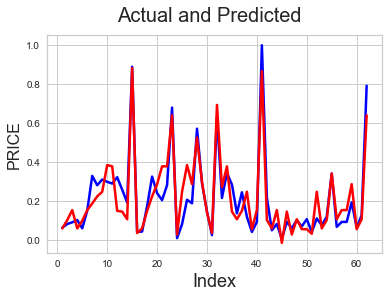

In [75]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,t_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,t_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('PRICE', fontsize=16)

Text(0,0.5,'t_test-t_pred')

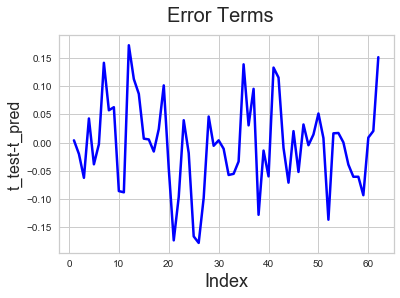

In [76]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,t_test-t_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('t_test-t_pred', fontsize=16) 

## Error terms are randomly distributed

## In model 5 we drop the values where the variables have p value more than 0.01

In [77]:
model5 =ca[['price','enginesize','bmw','porsche','volvo','rotor','fivecylinder']]
u= model5[['enginesize','bmw','porsche','volvo','rotor','fivecylinder']]
v = model5[['price']]

In [78]:
u_train, u_test, v_train, v_test = train_test_split(u, v, train_size=0.7 , random_state=100)

In [79]:
lu= LinearRegression()
lu.fit(u_train,v_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [80]:
print(lu.intercept_)

[-0.07398306]


In [81]:
v_pred = lu.predict(u_test)

In [82]:
u_train_sm = u_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
u_train_sm = sm.add_constant(u_train_sm)
# create a fitted model in one line
lu_1 = sm.OLS(v_train,u_train_sm).fit()

# print the coefficients
lu_1.params

const          -0.073983
enginesize      0.986136
bmw             0.209785
porsche         0.217794
volvo           0.107279
rotor           0.227356
fivecylinder    0.140066
dtype: float64

## From the summary we can see that all the p values are 0 and the difference between R squared and adjusted R squar

In [83]:
print(lu_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.11e-59
Time:                        22:26:44   Log-Likelihood:                 182.89
No. Observations:                 143   AIC:                            -351.8
Df Residuals:                     136   BIC:                            -331.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0740      0.011     -6.574   

In [84]:
vif_cal(input_data=ca[['price','enginesize','bmw','porsche','volvo',
                       'rotor','fivecylinder']],dependent_col='price')

,Var,Vif
0,enginesize,1.37
1,bmw,1.10
5,fivecylinder,1.10
2,porsche,1.09
3,volvo,1.08
4,rotor,1.00


In [85]:
mse = mean_squared_error(v_test, v_pred)
r_squared = r2_score(v_test, v_pred)

In [86]:
mse

0.005457153116971278

In [87]:
r_squared

0.8735526690342579

In [88]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(v_test, v_pred)))

RMSE : 0.07387254643621863


Text(0,0.5,'PRICE')

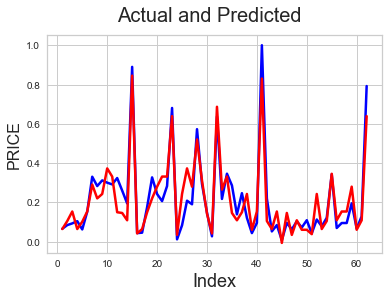

In [89]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,v_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,v_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('PRICE', fontsize=16)

Text(0,0.5,'v_test-v_pred')

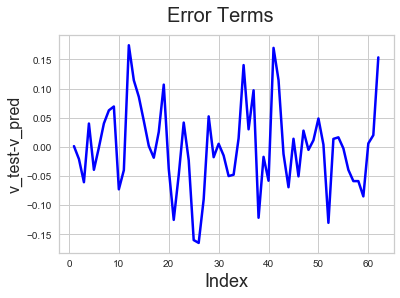

In [90]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,v_test-v_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('v_test-v_pred', fontsize=16) 

### Error term distribution

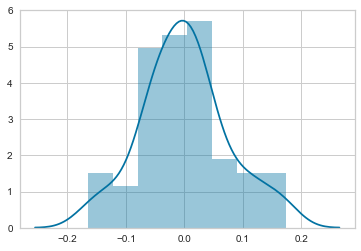

In [92]:
sns.distplot(v_test-v_pred)

## Let's make the residual plot of the data

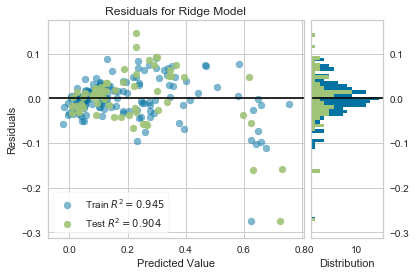

In [91]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

s